In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("credit_card_fraud_dataset.csv")

In [94]:
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [95]:
df = df.drop(columns=['TransactionDate'])

In [96]:
df

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,4189.27,688,refund,San Antonio,0
1,2,2659.71,109,refund,Dallas,0
2,3,784.00,394,purchase,New York,0
3,4,3514.40,944,purchase,Philadelphia,0
4,5,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99995,99996,1057.29,289,refund,San Antonio,0
99996,99997,297.25,745,refund,San Antonio,0
99997,99998,3448.56,690,purchase,San Antonio,0
99998,99999,3750.79,644,purchase,Philadelphia,0


In [97]:
# Step 4: Encode Categorical Features
categorical_cols = ['TransactionType', 'Location']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [98]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Separate features and target
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

# Apply ANOVA F-test
f_values, p_values = f_classif(X, y)

# Prepare results in a DataFrame
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values,
    'Significant (p<0.05)': p_values < 0.05
})

# Sort by F-Value or P-Value (optional)
anova_df.sort_values(by='F-Value', ascending=False, inplace=True)

# Display the result
print(anova_df)


           Feature   F-Value   P-Value  Significant (p<0.05)
1           Amount  0.195592  0.658303                 False
2       MerchantID  0.133963  0.714359                 False
3  TransactionType  0.130811  0.717593                 False
4         Location  0.019693  0.888399                 False
0    TransactionID  0.004353  0.947395                 False


C:\Users\SreeKeerthiReddyThat\AppData\Local\Temp\ipykernel_4412\431681615.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Value', y='Feature', data=anova_df.head(10), palette='viridis')


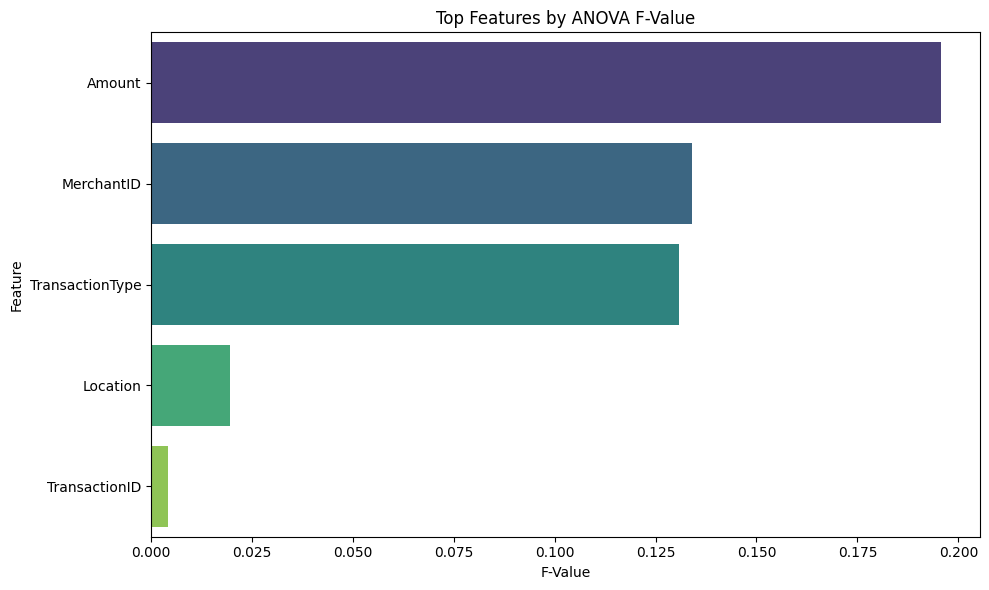

In [99]:
import seaborn as sns
# Plot bar chart of top F-values
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Value', y='Feature', data=anova_df.head(10), palette='viridis')
plt.title("Top Features by ANOVA F-Value")
plt.xlabel("F-Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [100]:
X = df[['Amount', 'MerchantID', 'TransactionType', 'Location']]
y = df['IsFraud']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
lof.fit(X_train_scaled)

LocalOutlierFactor(contamination=0.01, novelty=True)

In [104]:
# === Generate predictions for the training set ===
y_train_pred = lof.predict(X_train_scaled)
y_train_binary = [1 if val == -1 else 0 for val in y_train_pred]

# === Compute and print training metrics ===
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_accuracy  = accuracy_score(y_train, y_train_binary)
train_precision = precision_score(y_train, y_train_binary, zero_division=0)
train_recall    = recall_score(y_train, y_train_binary)
train_f1        = f1_score(y_train, y_train_binary)
train_cm        = confusion_matrix(y_train, y_train_binary)

print("=== Training Metrics ===")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1 Score:  {train_f1:.4f}")
print("Confusion Matrix:")
print(train_cm)


=== Training Metrics ===
Accuracy:  0.9826
Precision: 0.0056
Recall:    0.0044
F1 Score:  0.0049
Confusion Matrix:
[[68780   534]
 [  683     3]]


In [105]:
# === Generate predictions for the testing set ===
y_test_pred = lof.predict(X_test_scaled)
y_test_binary = [1 if val == -1 else 0 for val in y_test_pred]

# === Compute and print testing metrics ===
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

test_accuracy  = accuracy_score(y_test, y_test_binary)
test_precision = precision_score(y_test, y_test_binary, zero_division=0)
test_recall    = recall_score(y_test, y_test_binary)
test_f1        = f1_score(y_test, y_test_binary)
test_cm        = confusion_matrix(y_test, y_test_binary)

print("\n=== Testing Metrics ===")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1 Score:  {test_f1:.4f}")
print("Confusion Matrix:")
print(test_cm)



=== Testing Metrics ===
Accuracy:  0.9783
Precision: 0.0059
Recall:    0.0064
F1 Score:  0.0061
Confusion Matrix:
[[29347   339]
 [  312     2]]
